# **1. Latar Belakang dan Pernyataan Masalah**

## **1.1. Latar Belakang**

Selama 2 tahun terakhir sebuah perusahaan telah beberapa kali menjalankan marketing campaign untuk menarik customer dan diharapkan dapat meningkatkan penjualan produk-produk mereka. Perusahaan ingin mengetahui hasil dari marketing campaign yang telah dijalankan dengan Customer Personality Analysis.


## **1.2. Pernyataan Masalah**

Perusahaan ingin mengetahui karakteristik customer yang paling memungkinkan untuk membeli tiap-tiap produk agar strategi marketing campaign dapat difokuskan ke karakteristik customer tersebut daripada membuat strategi marketing campaign untuk semua tipe customer. <br>
Dengan membuat strategi marketing campaign yang terfokus pada karakteristik customer per masing-masing produk diharapkan dapat menekan biaya marketing campaign dan dapat meningkatkan penjualan masing-masing produk tersebut.

Sebagai seorang *data analyst*, kita akan mencoba menjawab pertanyaan berikut:
- **Bagaimana performa marketing campaign yang telah dijalankan oleh perusahaan?**
- **Bagaimana karakteristik customer dari masing-masing produk yang dipasarkan oleh perusahaan?**

# **2. Data**
Untuk menjawab pertanyaan di atas, kita akan menganalisa data peserta yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses [di sini](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis). 

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'white'
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

Dataset ini berisi informasi terkait karakteristk populasi customer dari banyak variable seperti tahun kelahiran, tingkat pendidikan, status perkawinan dll. Ada 29 kolom yang dibagi ke dalam 5 bagian di dataset marketing_campaign, yaitu:

People

- ID: Id unik tiap customer
- Year_Birth: Tahun kelahiran
- Education: Tingkat pendidikan customer
- Marital_Status: Status perkawinan customer
- Income: Pendapatan customer per tahun
- Kidhome: Jumlah anak kecil yang dimiliki customer
- Teenhome: Jumlah anak remaja yang dimiliki customer
- Dt_Customer: Tanggal pendaftaran customer ke perusahaan
- Recency: Jumlah hari sejak customer melakukan transaksi terakhir
- Complain: 1 jika customer melakukan komplain sejak dua tahun terakhir, 0 lainnya

Products

- MntWines: Jumlah belanja untuk produk Wine selama dua tahun terakhir
- MntFruits: Jumlah belanja untuk produk Buah selama dua tahun terakhir
- MntMeatProducts: Jumlah belanja untuk produk daging selama dua tahun terakhir
- MntFishProducts: Jumlah belanja untuk produk Ikan selama dua tahun terakhir
- MntSweetProducts: Jumlah belanja untuk produk Manisan selama dua tahun terakhir
- MntGoldProds: Jumlah belanja untuk produk Emas selama dua tahun terakhir

Promotion

- NumDealsPurchases: Jumlah pembelian menggunakan diskon
- AcceptedCmp1: 1 jika customer menerima penawaran di campaign ke-1, 0 lainnya
- AcceptedCmp2: 1 jika customer menerima penawaran di campaign ke-2, 0 lainnya
- AcceptedCmp3: 1 jika customer menerima penawaran di campaign ke-3, 0 lainnya
- AcceptedCmp4: 1 jika customer menerima penawaran di campaign ke-4, 0 lainnya
- AcceptedCmp5: 1 jika customer menerima penawaran di campaign ke-5, 0 lainnya
- Response: 1 jika customer menerima penawaran di campaign yang terakhir (diasumsikan campaign terakhir adalah campaign ke-6), 0 lainnya

Place

- NumWebPurchases: Jumlah pembelian melalui website perusahaan
- NumCatalogPurchases: Jumlah pembelian melalui menggunakan katalog
- NumStorePurchases: Jumlah pembelian langsung di toko
- NumWebVisitsMonth: Jumlah kunjungan ke website perusahaan pada bulan terakhir

Other

- Z_CostContact: Kolom tidak mempunyai arti pada dataset dan tidak mempunyai peran dalam analisis.
- Z_Revenue: Kolom tidak mempunyai arti pada dataset dan tidak mempunyai peran dalam analisis.

Berikut 5 baris teratas dan terbawah dari dataset marketing_campaign.

In [59]:
df=pd.read_csv('D:\Purwadhika\Python\Module_2\Capstone-2\Data\marketing_campaign.csv', sep='\t')
display(df.head(),df.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,3,11,1


# **3. Data Understanding**
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data preparation*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi dari dataset marketing_campaign.

## **3.1. Info Dataset**

In [60]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-nul

In [61]:
display(df.describe(), df.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


## **3.2. Check Unique Value in Dataset**

In [62]:
pd.set_option('display.max_colwidth', -1)
# data unit di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 08-05-2013, 06-06-2013, 13-03-2014, 15-11-2013, 10-10-2012, 24-11-2012, 24-12-2012, 31-08-2012, 28-03-2013, 03-11-2012, 08-08-2012, 06-01-2013, 23-12-2012, 11-01-2014, 18-03-2013, 02-01-2013, 27-05-2013, 20-02-2013, 31-05-2013, 22-11-2013, 22-05-2014, 11-05-2013, 29-10-2012, 29-08-2013, 31-12-2013, 02-09-2013, 11-02-2014, 01-02-2013, 29-04-2013, 12-03-2013, 05-11-2013, 02-10-2013, 28-06-2014, 09-11-2012, 24-05-2013, 01-01-2014, 08-11-2012, 12-05-2014, 11-08-2012, 07-06-2014, 12-06-2013, 19-11-2012, 02-04-2013, 28-04-2014, 17-06-2013, 03-03-2014, 04-07-2013, 07-09-2012, 18-02-2013, 11-06-2013, 06-12-2013, 21-05-2013, 11-05-2014, 19-03-2014, 27-09-2013, 08-04-2013, 11-09-2012, 14-09-2012, 17-03-2013, 05-04-2013, 30-04-2014, 19-12-2012, 27-08-2012, 12-10-2012, 04-09-2013, 29-08-2012, 23-06-2013, 03-07-2013, 25-02-2014, 11-08-2013, 16-07-2013, 28-05-2014, 21-01-2014, 27-05-2014, 23-11-2013, 23-03-2014, 24-05-2014, 22-11-2012, 11-04-2013, 01-12-2013, 20-06-2013, 23-07-2013, 30-03-2014, 20-04-2013, 17-05-2013, 08-05-2014, 10-12-2013, 24-09-2013, 02-02-2013, 07-12-2012, 02-11-2013, 10-11-2012, 25-06-2014, ...]"
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 80, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 25, 40, 9, 87, 5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27, 74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81, 14, 52, 93, 50, 60, 66, 97, 62, 6, 33, 67, 22, 71, 7]"
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86, 1, 867, 384, 270, 36, 684, 8, 112, 110, 96, 482, 40, 702, 55, 437, 421, 13, 9, 81, 123, 48, 826, 245, 650, 12, 510, 3

## **3.3. Check Duplicate in Dataset**

In [63]:
df[df.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


## **3.4. Check Missing Value in Dataset**

In [64]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

<AxesSubplot:>

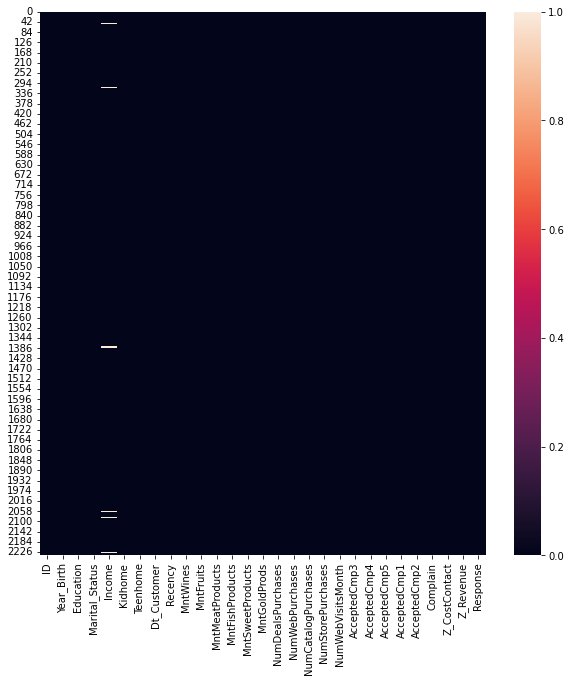

In [65]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df.isna())

## **3.5. Check Outlier in Dataset**

- Outlier kolom `Year_Birth`<br>
Berdasarkan [data](https://ourworldindata.org/life-expectancy#:~:text=The%20United%20Nations%20estimate%20a,life%20expectancy%20of%2072.3%20year) rata-rata life expectancy dunia adalah 73 tahun. Jadi Kita akan berasumsi data `Year_Birth` customer yang kebih kecil dari 1941 (memiliki usia lebih dari 73 tahun saat data ini diambil pada tahun 2014) adalah outlier.

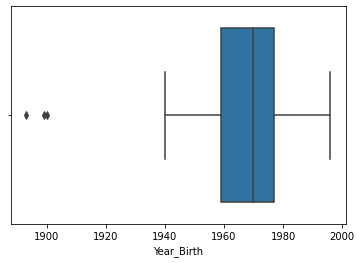

In [66]:
sns.boxplot(x=df['Year_Birth'])
plt.show()

In [67]:
df[df['Year_Birth'] < 1941]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,3,11,0
239,11004,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,3,11,0
339,1150,1899,PhD,Together,83532.0,0,0,26-09-2013,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,3,11,0
1950,6663,1940,PhD,Single,51141.0,0,0,08-07-2013,96,144,0,7,0,0,6,1,3,1,4,5,0,0,0,0,0,0,3,11,0


- Outlier kolom `Income`<br>
Terdapat 1 data yang memiliki income 666666.0 yang sangat jauh dari populasi customer lainnya, karena itu kita berasumsi data ini adalah outlier.

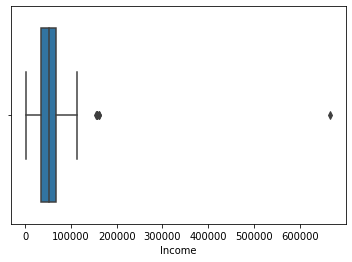

In [68]:
sns.boxplot(x=df['Income'])
plt.show()

In [69]:
df[df['Income'] > 200000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2233,9432,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,3,11,0


## **3.6. Hasil Data Understanding**

Secara umum, kita bisa melihat bahwa:

- Dataset marketing_campaign memiliki 29 kolom dan 2240 baris
- Terdapat anomali unique value pada kolom `Education` yang berisi [Graduation, PhD, Master, Basic, 2n Cycle] sehingga menimbulkan keambiguan.
- Terdapat anomali unique value pada kolom `Marital_Status` yang berisi [Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO] sehingga menimbulkan keambiguan.
- Hanya terdapat satu unique value di kolom `Z_CostContact` dan `Z_Revenue` sehingga kedua kolom ini tidak akan berguna untuk analisis data
- Tidak terdapat data duplicate di dataset
- *Missing value* hanya terdapat di kolom `Income` dan memiliki proporsi yang cukup kecil yaitu sekitar 1%.
- *Outlier* terdapat di kolom `Year_Birth` dan `Income` dengan total 5 row data.

# **4. Data Preparation**

Setelah kita sudah melihat dan memahami dataset dan anomali yang dimilikinya, 
selanjutnya kita tangani tiap-tiap anomali secara lebih jauh dan mempersiapkan data sebelum masuk ke tahap analisis.  

## **4.1. Anomali Kolom Marital_Status**

Terdapat anomali unique value pada kolom `Marital_Status` yang berisi [Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO] sehingga menimbulkan keambiguan.

Untuk menangani anomali ini kita akan mengelompokkan unique value menjadi dua yaitu Single dan In Relationship

In [70]:
df['Marital_Status'].value_counts()  

Married     864
Together    580
Single      480
Divorced    232
Widow       77 
Alone       3  
Absurd      2  
YOLO        2  
Name: Marital_Status, dtype: int64

In [71]:
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'],'In Relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

In [72]:
df['Marital_Status'].value_counts()  

In Relationship    1444
Single             796 
Name: Marital_Status, dtype: int64

## **4.1. Anomali Kolom Education**

Terdapat anomali unique value pada kolom `Education` yang berisi [Graduation, PhD, Master, Basic, 2n Cycle] sehingga menimbulkan keambiguan.

Untuk menangani anomali ini kita akan mengelompokkan unique value menjadi dua yaitu Undergraduate dan Postgraduate

In [73]:
df['Education'].value_counts()  

Graduation    1127
PhD           486 
Master        370 
2n Cycle      203 
Basic         54  
Name: Education, dtype: int64

In [74]:
df['Education'] = df['Education'].replace(['Graduation', 'Basic'],'Undergraduate')
df['Education'] = df['Education'].replace(['PhD', 'Master', '2n Cycle'],'Postgraduate')

In [75]:
df['Education'].value_counts()  

Undergraduate    1181
Postgraduate     1059
Name: Education, dtype: int64

## **4.2. Penanganan Missing Value**

*Missing value* hanya terdapat di kolom `Income` dan memiliki proporsi yang cukup kecil yaitu sekitar 1%.

Untuk menanganinya kita akan drop data yang memiliki *missing value* di kolom `Income`, karena hanya memiliki proporsi sekitar 1% sehingga tidak berpengaruh signifikan jika kita drop data tersebut.

In [76]:
df = df.dropna()
df.isna().sum()/df.shape[0]*100

ID                     0.0
Year_Birth             0.0
Education              0.0
Marital_Status         0.0
Income                 0.0
Kidhome                0.0
Teenhome               0.0
Dt_Customer            0.0
Recency                0.0
MntWines               0.0
MntFruits              0.0
MntMeatProducts        0.0
MntFishProducts        0.0
MntSweetProducts       0.0
MntGoldProds           0.0
NumDealsPurchases      0.0
NumWebPurchases        0.0
NumCatalogPurchases    0.0
NumStorePurchases      0.0
NumWebVisitsMonth      0.0
AcceptedCmp3           0.0
AcceptedCmp4           0.0
AcceptedCmp5           0.0
AcceptedCmp1           0.0
AcceptedCmp2           0.0
Complain               0.0
Z_CostContact          0.0
Z_Revenue              0.0
Response               0.0
dtype: float64

## **4.3. Penanganan Outlier**

*Outlier* terdapat di kolom `Year_Birth` dan `Income` dengan total 5 row data.

Untuk menanganinya kita akan drop data yang memiliki *outlier* di kedua kolom tersebut, karena hanya terdiri dari 5 row data sehingga tidak berpengaruh signifikan jika kita drop data tersebut.

In [77]:
df.drop(df[df['Year_Birth'] < 1941].index, inplace=True)
df.drop(df[df['Income'] > 200000].index, inplace=True)

In [78]:
df[df['Income'] > 200000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [79]:
df[df['Year_Birth'] < 1941]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


## **4.3. Membuat Kolom Age_Group**

Kita akan menglompokkan customer menjadi beberapa grup usia berdasarkan tahun kelahirannya di kolom `Age_Group`.
Pengelompokkan grup usia dilakukan berdasarkan referensi dari [artikel ini](https://www.kasasa.com/exchange/articles/generations/gen-x-gen-y-gen-z) .

In [80]:
df['Age_Group'] = ['BabyBoomers' if x <= 1964 else 'GenX' if x >= 1965 and x < 1980 else 'Milennials' for x in df['Year_Birth']]
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age_Group
0,5524,1957,Undergraduate,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,BabyBoomers
1,2174,1954,Undergraduate,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,BabyBoomers
2,4141,1965,Undergraduate,In Relationship,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,GenX
3,6182,1984,Undergraduate,In Relationship,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,Milennials
4,5324,1981,Postgraduate,In Relationship,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,Milennials
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Undergraduate,In Relationship,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,GenX
2236,4001,1946,Postgraduate,In Relationship,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,BabyBoomers
2237,7270,1981,Undergraduate,Single,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,Milennials
2238,8235,1956,Postgraduate,In Relationship,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,BabyBoomers


## **4.3. Membuat Kolom TotalAcceptedCmp**

Kita akan membuat kolom `TotalAcceptedCmp` untuk menampung total campaign yang telah diterima oleh masing-masing customer.

In [81]:
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']
df.sort_values('TotalAcceptedCmp')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age_Group,TotalAcceptedCmp
1121,4713,1979,Postgraduate,In Relationship,31605.0,1,0,22-11-2012,15,74,0,42,2,1,6,2,2,1,4,7,0,0,0,0,0,0,3,11,0,GenX,0
1136,10542,1968,Postgraduate,In Relationship,36778.0,1,1,05-08-2012,63,29,4,34,2,4,4,3,3,0,3,9,0,0,0,0,0,0,3,11,0,GenX,0
1135,7613,1974,Postgraduate,In Relationship,49669.0,1,0,24-05-2014,97,166,5,107,11,8,29,2,5,1,6,6,0,0,0,0,0,0,3,11,0,GenX,0
1900,10789,1964,Postgraduate,In Relationship,45759.0,1,1,23-02-2013,13,42,1,18,3,0,4,2,2,0,3,7,0,0,0,0,0,0,3,11,0,BabyBoomers,0
1901,10779,1983,Undergraduate,Single,22148.0,0,0,13-04-2014,16,15,5,14,0,4,11,1,1,0,3,7,0,0,0,0,0,0,3,11,0,Milennials,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1922,3138,1956,Undergraduate,Single,91249.0,0,0,20-10-2012,84,1324,27,119,71,108,27,0,7,9,6,4,0,1,1,1,1,0,3,11,1,BabyBoomers,5
430,3725,1961,Postgraduate,Single,84865.0,0,0,09-05-2013,1,1248,16,349,43,16,16,1,2,4,9,4,0,1,1,1,1,0,3,11,1,BabyBoomers,5
1087,1509,1958,Postgraduate,In Relationship,84460.0,0,0,04-01-2013,80,152,27,103,106,54,81,0,9,9,4,5,0,1,1,1,1,0,3,11,1,BabyBoomers,5
1710,477,1986,Undergraduate,In Relationship,83512.0,0,0,17-06-2014,31,1060,61,835,80,20,101,1,4,7,10,1,1,0,1,1,1,0,3,11,1,Milennials,5


## **4.3. Membuat Kolom Parent**

Kita akan membuat kolom `Parent` yang berisi 1 jika customer memiliki anak dan berisi 0 jika customer tidak memiliki anak.

In [82]:
df.loc[df['Teenhome'] > 0, 'Parent'] = 1
df.loc[df['Teenhome'] == 0, 'Parent'] = 0
df.loc[df['Kidhome'] > 0, 'Parent'] = 1
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age_Group,TotalAcceptedCmp,Parent
0,5524,1957,Undergraduate,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,BabyBoomers,1,0.0
1,2174,1954,Undergraduate,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,BabyBoomers,0,1.0
2,4141,1965,Undergraduate,In Relationship,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,GenX,0,0.0
3,6182,1984,Undergraduate,In Relationship,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,Milennials,0,1.0
4,5324,1981,Postgraduate,In Relationship,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,Milennials,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Undergraduate,In Relationship,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,GenX,0,1.0
2236,4001,1946,Postgraduate,In Relationship,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,BabyBoomers,1,1.0
2237,7270,1981,Undergraduate,Single,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,Milennials,1,0.0
2238,8235,1956,Postgraduate,In Relationship,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,BabyBoomers,0,1.0


## **4.4. Drop Kolom yang Tidak Dibutuhkan**

Kita akan melakukan drop pada kolom yang redundant.

In [83]:
df = df.drop(columns=['Z_CostContact','Z_Revenue'])

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2211 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2211 non-null   int64  
 1   Year_Birth           2211 non-null   int64  
 2   Education            2211 non-null   object 
 3   Marital_Status       2211 non-null   object 
 4   Income               2211 non-null   float64
 5   Kidhome              2211 non-null   int64  
 6   Teenhome             2211 non-null   int64  
 7   Dt_Customer          2211 non-null   object 
 8   Recency              2211 non-null   int64  
 9   MntWines             2211 non-null   int64  
 10  MntFruits            2211 non-null   int64  
 11  MntMeatProducts      2211 non-null   int64  
 12  MntFishProducts      2211 non-null   int64  
 13  MntSweetProducts     2211 non-null   int64  
 14  MntGoldProds         2211 non-null   int64  
 15  NumDealsPurchases    2211 non-null   i

## **4.5. Hasil Data Preparation**

Kita sudah selesai mempersiapkan dataset untuk digunakan dalam analisis, sekarang mari kita lihat sekilas informasi dari data yang sudah kita siapkan.

In [85]:
pd.set_option('display.max_colwidth', -1)

listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(2211, 30)


,dataFeatures,dataType,null,unique,uniqueSample
0,ID,int64,0,2211,"[3009, 9888]"
1,Year_Birth,int64,0,55,"[1980, 1993]"
2,Education,object,0,2,"[Postgraduate, Undergraduate]"
3,Marital_Status,object,0,2,"[In Relationship, Single]"
4,Income,float64,0,1969,"[16626.0, 76542.0]"
5,Kidhome,int64,0,3,"[1, 0]"
6,Teenhome,int64,0,3,"[2, 0]"
7,Dt_Customer,object,0,662,"[19-12-2012, 14-05-2013]"
8,Recency,int64,0,100,"[77, 56]"
9,MntWines,int64,0,775,"[688, 551]"


In [86]:
# Export to csv
df.to_csv("output.csv")

# **5. Data Analysis**

Kita sudah melakukan tahap _data preparation_. Sekarang, kita bisa mulai melakukan analisis untuk mencari tahu **bagaimana performa campaign selama 2 tahun kebelakang dan karakteristik customer dari tiap produk**.

## **5.1 Korelasi Antar Kolom**

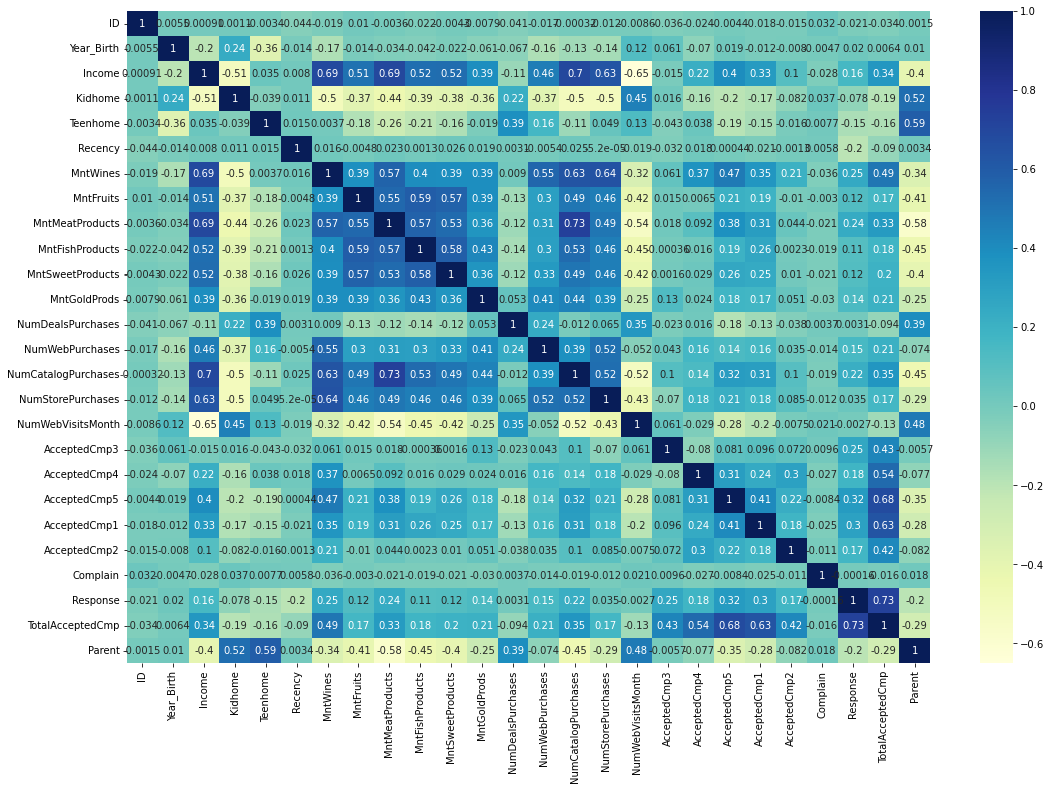

In [87]:
plt.figure(figsize=(18,12))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [115]:
df[['NumWebVisitsMonth', 'NumWebPurchases']].corr()

,NumWebVisitsMonth,NumWebPurchases
NumWebVisitsMonth,1.000000,-0.051614
NumWebPurchases,-0.051614,1.000000


Berdasarkan heatmap diatas terdapat insight bahwa ternyata jumlah kunjungan web (`NumWebVisitsMonth`) tidak berpengaruh signifikan terhadap jumlah pembelian melalui web (`NumWebPurchases`). Hal ini dapat menandakan bahwa engagement customer dari web perusahaan kurang baik

## **5.2 Performa Campaign 2 Tahun Terakhir**

Selama 2 tahun terakhir perusahaan telah menjalankan 6 marketing campaign. Mari kita lihat bagaimana performa campaign selama 2 tahun tersebut berdasarkan proporsi customer yang sudah menerima dan belum menerima campaign.

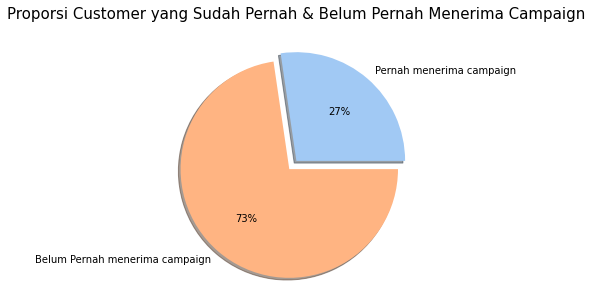

In [88]:
data = [df[df['TotalAcceptedCmp']>0]['TotalAcceptedCmp'].count(), df[df['TotalAcceptedCmp']==0]['TotalAcceptedCmp'].count()]
labels = ['Pernah menerima campaign', 'Belum Pernah menerima campaign']

plt.figure(figsize=(7, 5)) # Change size
plt.title('Proporsi Customer yang Sudah Pernah & Belum Pernah Menerima Campaign', size=15) 
colors = sns.color_palette("pastel")[00:5]

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%', explode=(0, 0.1,),shadow=True)
plt.show()

Dari perhitungan proporsi diatas hanya terdapat 27% dari total populasi customer yang sudah pernah menerima campaign selama 2 tahun terakhir.
Jika dilihat proporsi customer yang sudah menerima campaign tergolong kecil sehingga dapat dikatakan bahwa strategi marketing campaign perusahaan selama 2 tahun terakhir belum berjalan dengan baik.

In [89]:
df_byAG = df.groupby('Age_Group').mean()
df_byAG

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalAcceptedCmp,Parent
Age_Group,,,,,,,,,,,,,,,,,,,,,,,,,,
BabyBoomers,5664.306096,1955.709468,57321.154345,0.245136,0.701686,49.704280,380.172503,28.364462,185.797665,42.718547,29.120623,49.452659,2.390402,4.526589,3.277562,6.422827,4.839170,0.057069,0.094682,0.072633,0.080415,0.016861,0.012970,0.145266,0.466926,0.661479
GenX,5467.639569,1972.204701,49996.458374,0.545544,0.546523,48.996082,271.539667,23.883448,145.727718,33.049951,24.933399,40.611166,2.491675,4.023506,2.328110,5.553379,5.628795,0.072478,0.067581,0.054848,0.045054,0.011753,0.004897,0.137120,0.388834,0.817826
Milennials,5723.324582,1985.260143,46875.307876,0.551313,0.047733,47.704057,250.112172,28.608592,184.785203,39.615752,28.443914,41.923628,1.799523,3.441527,2.400955,5.293556,5.460621,0.107399,0.052506,0.116945,0.081146,0.011933,0.011933,0.193317,0.563246,0.560859


## **5.3 Karakteristik Customer Produk Wine**

In [90]:
df_wine = df[df['MntWines']>0]
df_wine.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalAcceptedCmp,Parent
count,2198.00000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000
mean,5583.50091,1968.878981,52159.040491,0.442220,0.509099,48.948135,307.166515,26.483167,168.073248,37.837580,27.193358,44.154686,2.331665,4.106460,2.688808,5.826661,5.313922,0.073703,0.074613,0.073248,0.064604,0.013649,0.009099,0.151501,0.451319,0.716561
std,3245.06733,11.668884,21432.710294,0.537261,0.544479,28.926697,337.557399,39.823169,224.584996,54.892716,41.179419,51.790505,1.928302,2.740738,2.929388,3.251060,2.428907,0.261347,0.262826,0.260603,0.245882,0.116054,0.094976,0.358618,0.895112,0.450770
min,0.00000,1941.000000,1730.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2817.75000,1959.000000,35682.500000,0.000000,0.000000,24.000000,25.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5454.50000,1970.000000,51533.000000,0.000000,0.000000,49.000000,179.000000,8.000000,68.000000,12.000000,8.000000,25.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,8415.50000,1977.000000,68655.000000,1.000000,1.000000,74.000000,507.750000,33.000000,235.000000,50.000000,34.000000,57.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,11191.00000,1996.000000,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000


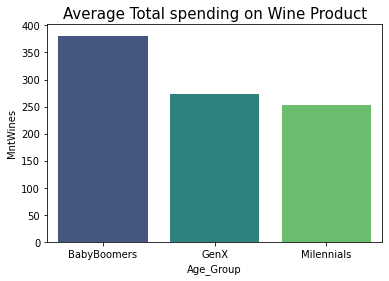

In [91]:
plt.title('Average Total spending on Wine Product', size=15) 
sns.barplot(y=df_wine['MntWines'], x=df_wine['Age_Group'], palette='viridis', ci=0)
plt.show()

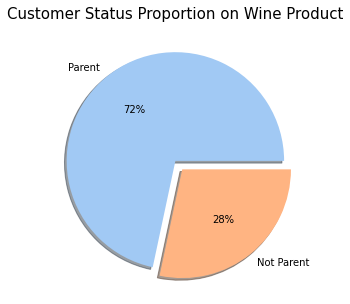

In [92]:
data = [df_wine[df_wine['Parent']==1]['Parent'].count(), df_wine[df_wine['Parent']==0]['Parent'].count()]
labels = ['Parent', 'Not Parent']

plt.figure(figsize=(7, 5)) # Change size
plt.title('Customer Status Proportion on Wine Product', size=15) 
colors = sns.color_palette("pastel")[00:5]

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%', explode=(0, 0.1),shadow=True)
plt.show()

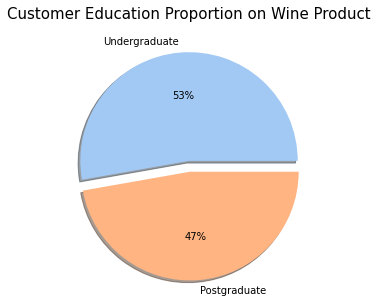

In [93]:
data = [df_wine[df_wine['Education']=='Undergraduate']['Education'].count(), df_wine[df_wine['Education']=='Postgraduate']['Education'].count()]
labels = ['Undergraduate', 'Postgraduate']

plt.figure(figsize=(7, 5)) # Change size
plt.title('Customer Education Proportion on Wine Product', size=15) 
colors = sns.color_palette("pastel")[00:5]

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%', explode=(0, 0.1,),shadow=True)
plt.show()


Karakteristik customer yang mengeluarkan uang untuk membeli produk wine yaitu sebagian besar kelompok usia BabyBoomers, sebagian besar parent, dan untuk edukasi proporsinya hampir seimbang antara postgraduate dengan undergraduate. 

## **5.4 Karakteristik Customer Produk Fruit**

In [94]:
df_fruit = df[df['MntFruits']>0]
df_fruit.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalAcceptedCmp,Parent
count,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000
mean,5551.650715,1969.111111,53538.793729,0.400440,0.463146,49.554455,320.476348,32.035754,188.443344,43.174367,30.991749,48.326733,2.302530,4.276678,2.916392,6.068207,5.134763,0.073157,0.068207,0.082508,0.067657,0.011551,0.008801,0.161716,0.464796,0.671617
std,3257.799726,11.842703,22172.908559,0.519557,0.542133,29.117691,335.175913,41.703798,231.594569,56.958789,42.789105,53.080929,1.895394,2.702435,2.957346,3.264318,2.469626,0.260466,0.252170,0.275213,0.251225,0.106883,0.093425,0.368292,0.917705,0.469754
min,0.000000,1941.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2741.750000,1959.000000,35791.750000,0.000000,0.000000,24.000000,28.000000,4.000000,21.000000,4.000000,3.000000,12.000000,1.000000,2.000000,1.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5341.500000,1970.000000,54597.000000,0.000000,0.000000,50.000000,204.500000,14.000000,91.000000,16.000000,12.000000,29.000000,2.000000,4.000000,2.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,8404.250000,1978.000000,70788.250000,1.000000,1.000000,75.000000,526.000000,43.000000,270.750000,62.000000,41.000000,64.000000,3.000000,6.000000,5.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,11191.000000,1996.000000,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000


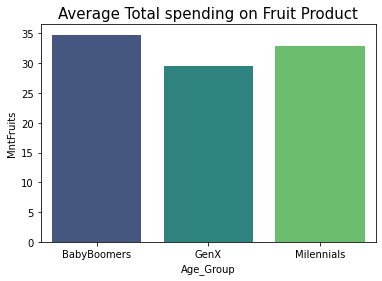

In [95]:
plt.title('Average Total spending on Fruit Product', size=15) 
sns.barplot(y=df_fruit['MntFruits'], x=df_fruit['Age_Group'], palette='viridis', ci=0)
plt.show()

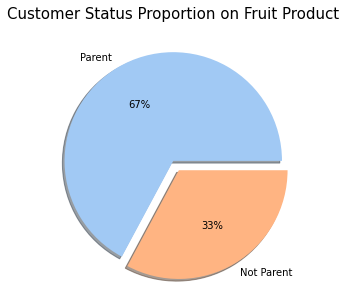

In [96]:
data = [df_fruit[df_fruit['Parent']==1]['Parent'].count(), df_fruit[df_fruit['Parent']==0]['Parent'].count()]
labels = ['Parent', 'Not Parent']

plt.figure(figsize=(7, 5)) # Change size
plt.title('Customer Status Proportion on Fruit Product', size=15) 
colors = sns.color_palette("pastel")[00:5]

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%', explode=(0, 0.1,),shadow=True)
plt.show()

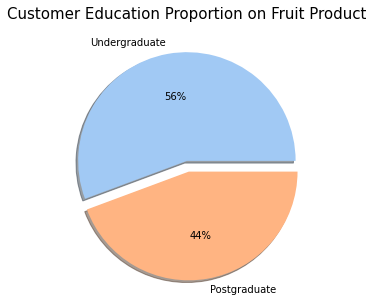

In [97]:
data = [df_fruit[df_fruit['Education']=='Undergraduate']['Education'].count(), df_fruit[df_fruit['Education']=='Postgraduate']['Education'].count()]
labels = ['Undergraduate', 'Postgraduate']

plt.figure(figsize=(7, 5)) # Change size
plt.title('Customer Education Proportion on Fruit Product', size=15) 
colors = sns.color_palette("pastel")[00:5]

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%', explode=(0, 0.1,),shadow=True)
plt.show()


Karakteristik customer yang mengeluarkan uang untuk membeli produk fruit yaitu sebagian besar kelompok usia BabyBoomers dan Millenials, sebagian besar parent, dan untuk edukasi proporsinya hampir seimbang antara postgraduate dengan undergraduate. 

## **5.5 Karakteristik Customer Produk Meat**

In [98]:
df_meat = df[df['MntMeatProducts']>0]
df_meat.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalAcceptedCmp,Parent
count,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.00000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.00000,2210.000000,2210.000000,2210.000000
mean,5582.566516,1968.923982,51977.511312,0.442081,0.506335,49.013122,305.498643,26.353394,167.177828,37.68009,27.070136,43.960181,2.325792,4.090045,2.674208,5.809050,5.321267,0.073756,0.074208,0.072851,0.064253,0.013575,0.00905,0.150679,0.449321,0.714932
std,3247.401019,11.689998,21519.752151,0.537033,0.544286,28.930433,337.395576,39.754139,224.301950,54.78682,41.102100,51.717783,1.924965,2.742543,2.928098,3.251174,2.426642,0.261432,0.262169,0.259950,0.245259,0.115743,0.09472,0.357816,0.893319,0.451549
min,0.000000,1941.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,2814.250000,1959.000000,35265.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.00000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,5453.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,176.000000,8.000000,68.000000,12.00000,8.000000,25.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000
75%,8417.500000,1977.000000,68487.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.750000,50.00000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000
max,11191.000000,1996.000000,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.00000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,5.000000,1.000000


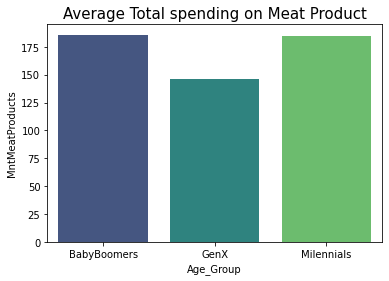

In [99]:
plt.title('Average Total spending on Meat Product', size=15) 
sns.barplot(y=df_meat['MntMeatProducts'], x=df_meat['Age_Group'], palette='viridis', ci=0)
plt.show()

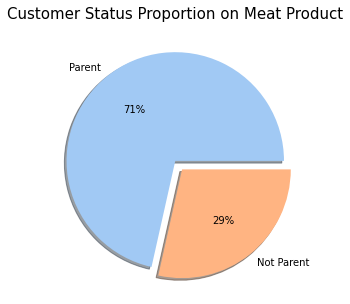

In [100]:
data = [df_meat[df_meat['Parent']==1]['Parent'].count(), df_meat[df_meat['Parent']==0]['Parent'].count()]
labels = ['Parent', 'Not Parent']

plt.figure(figsize=(7, 5)) # Change size
plt.title('Customer Status Proportion on Meat Product', size=15) 
colors = sns.color_palette("pastel")[00:5]

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%', explode=(0, 0.1,),shadow=True)
plt.show()

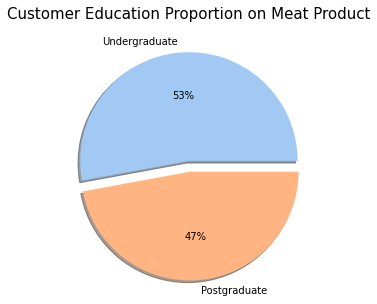

In [101]:
data = [df_meat[df_meat['Education']=='Undergraduate']['Education'].count(), df_meat[df_meat['Education']=='Postgraduate']['Education'].count()]
labels = ['Undergraduate', 'Postgraduate']

plt.figure(figsize=(7, 5)) # Change size
plt.title('Customer Education Proportion on Meat Product', size=15) 
colors = sns.color_palette("pastel")[00:5]

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%', explode=(0, 0.1,),shadow=True)
plt.show()

Karakteristik customer yang mengeluarkan uang untuk membeli produk meat yaitu sebagian besar kelompok usia BabyBoomers dan Millenials, sebagian besar parent, dan untuk edukasi proporsinya hampir seimbang antara postgraduate dengan undergraduate. 

## **5.6 Karakteristik Customer Produk Fish**

In [102]:
df_fish = df[df['MntFishProducts']>0]
df_fish.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalAcceptedCmp,Parent
count,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.00000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000
mean,5543.877796,1969.249864,53390.713584,0.399891,0.459356,49.542280,320.414075,30.352428,189.265139,45.433170,31.389525,47.979815,2.320786,4.265139,2.951991,6.064375,5.125477,0.06874,0.062739,0.078560,0.067103,0.010366,0.007092,0.157665,0.445172,0.669940
std,3237.670971,11.860671,22357.634290,0.520266,0.538487,28.934867,334.904052,41.715403,234.028449,57.155394,43.336438,52.820028,1.961888,2.693509,3.025165,3.275088,2.511452,0.25308,0.242559,0.269124,0.250269,0.101310,0.083939,0.364526,0.887424,0.470363
min,0.000000,1941.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2793.000000,1960.000000,35788.000000,0.000000,0.000000,25.000000,29.000000,3.000000,21.000000,6.000000,3.000000,11.000000,1.000000,2.000000,1.000000,3.000000,3.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5350.000000,1971.000000,54252.000000,0.000000,0.000000,50.000000,208.000000,12.000000,92.000000,19.000000,12.000000,29.000000,2.000000,4.000000,2.000000,5.000000,5.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,8369.000000,1978.000000,70566.000000,1.000000,1.000000,75.000000,520.000000,40.000000,270.000000,64.000000,42.000000,64.000000,3.000000,6.000000,5.000000,8.000000,7.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,11191.000000,1996.000000,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000


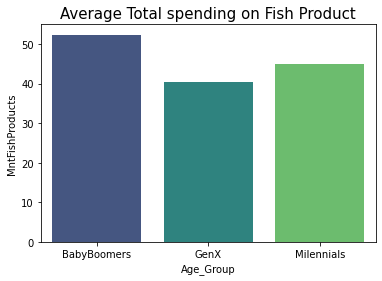

In [103]:
plt.title('Average Total spending on Fish Product', size=15) 
sns.barplot(y=df_fish['MntFishProducts'], x=df_fish['Age_Group'], palette='viridis', ci=0)
plt.show()

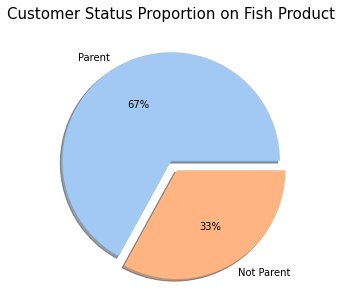

In [104]:
data = [df_fish[df_fish['Parent']==1]['Parent'].count(), df_fish[df_fish['Parent']==0]['Parent'].count()]
labels = ['Parent', 'Not Parent']

plt.figure(figsize=(7, 5)) # Change size
plt.title('Customer Status Proportion on Fish Product', size=15) 
colors = sns.color_palette("pastel")[00:5]

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%', explode=(0, 0.1,),shadow=True)
plt.show()

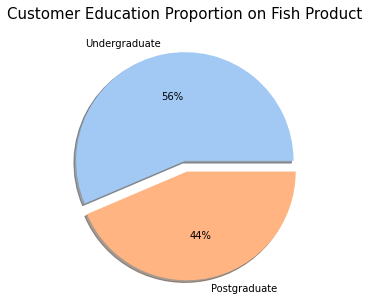

In [105]:
data = [df_fish[df_fish['Education']=='Undergraduate']['Education'].count(), df_fish[df_fish['Education']=='Postgraduate']['Education'].count()]
labels = ['Undergraduate', 'Postgraduate']

plt.figure(figsize=(7, 5)) # Change size
plt.title('Customer Education Proportion on Fish Product', size=15) 
colors = sns.color_palette("pastel")[00:5]

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%', explode=(0, 0.1,),shadow=True)
plt.show()


Karakteristik customer yang mengeluarkan uang untuk membeli produk fish yaitu sebagian besar kelompok usia BabyBoomers, sebagian besar parent, dan untuk edukasi proporsinya hampir seimbang antara postgraduate dengan undergraduate. 

## **5.7 Karakteristik Customer Produk Sweet**

In [106]:
df_sweet = df[df['MntSweetProducts']>0]
df_sweet.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalAcceptedCmp,Parent
count,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000
mean,5531.085556,1969.452222,53301.009444,0.400556,0.460000,48.933889,320.705556,30.590000,188.881111,43.350000,33.237222,47.804444,2.330556,4.260000,2.936667,6.099444,5.128889,0.072222,0.062778,0.082778,0.071667,0.010000,0.008889,0.161111,0.460556,0.673889
std,3232.430925,11.799037,22264.841166,0.516649,0.537178,29.044762,337.670277,41.887601,233.005828,56.900914,43.235190,52.230989,1.944522,2.686958,3.020477,3.280918,2.491798,0.258927,0.242630,0.275623,0.258007,0.099526,0.093887,0.367736,0.910442,0.468919
min,0.000000,1943.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2805.750000,1960.000000,35683.500000,0.000000,0.000000,24.000000,27.750000,3.000000,21.000000,4.000000,4.000000,12.000000,1.000000,2.000000,1.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5322.000000,1971.000000,54364.000000,0.000000,0.000000,49.000000,202.000000,12.000000,92.000000,17.000000,14.000000,29.000000,2.000000,4.000000,2.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,8315.000000,1978.000000,70639.250000,1.000000,1.000000,74.000000,522.250000,40.250000,270.250000,62.000000,44.000000,63.000000,3.000000,6.000000,5.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,11191.000000,1996.000000,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000


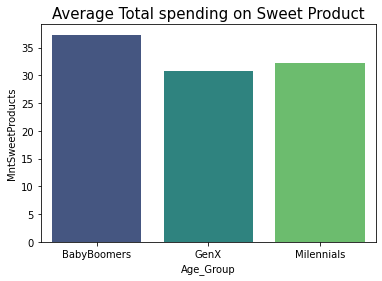

In [107]:
plt.title('Average Total spending on Sweet Product', size=15) 
sns.barplot(y=df_sweet['MntSweetProducts'], x=df_sweet['Age_Group'], palette='viridis', ci=0)
plt.show()

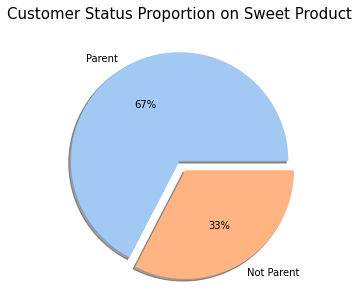

In [108]:
data = [df_sweet[df_sweet['Parent']==1]['Parent'].count(), df_sweet[df_sweet['Parent']==0]['Parent'].count()]
labels = ['Parent', 'Not Parent']

plt.figure(figsize=(7, 5)) # Change size
plt.title('Customer Status Proportion on Sweet Product', size=15) 
colors = sns.color_palette("pastel")[00:5]

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%', explode=(0, 0.1,),shadow=True)
plt.show()

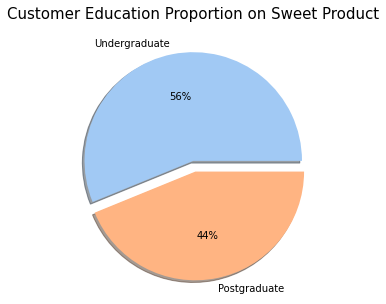

In [109]:
data = [df_sweet[df_sweet['Education']=='Undergraduate']['Education'].count(), df_sweet[df_sweet['Education']=='Postgraduate']['Education'].count()]
labels = ['Undergraduate', 'Postgraduate']

plt.figure(figsize=(7, 5)) # Change size
plt.title('Customer Education Proportion on Sweet Product', size=15) 
colors = sns.color_palette("pastel")[00:5]

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%', explode=(0, 0.1,),shadow=True)
plt.show()


Karakteristik customer yang mengeluarkan uang untuk membeli produk sweet yaitu sebagian besar kelompok usia BabyBoomers, sebagian besar parent, dan untuk edukasi proporsinya hampir seimbang antara postgraduate dengan undergraduate. 

## **5.8 Karakteristik Customer Produk Gold**

In [110]:
df_gold = df[df['MntGoldProds']>0]
df_gold.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalAcceptedCmp,Parent
count,2150.000000,2150.000000,2150.000000,2150.000000,2150.000000,2150.000000,2150.000000,2150.000000,2150.000000,2150.000000,2150.000000,2150.000000,2150.000000,2150.000000,2150.000000,2150.000000,2150.000000,2150.000000,2150.000000,2150.000000,2150.000000,2150.000000,2150.000000,2150.000000,2150.000000,2150.000000
mean,5570.138605,1968.982791,51965.268837,0.440465,0.507907,49.021860,305.008372,26.728837,166.406512,38.284186,27.385581,45.189767,2.348372,4.122326,2.683256,5.827442,5.341395,0.075814,0.073488,0.071628,0.063721,0.013488,0.009302,0.150233,0.448372,0.716744
std,3252.432323,11.676626,21604.375004,0.535340,0.544598,28.870243,334.152892,39.958232,223.005488,55.266398,41.323697,51.900971,1.939291,2.742800,2.924782,3.251157,2.424420,0.264762,0.260997,0.257931,0.244312,0.115380,0.096021,0.357382,0.893534,0.450684
min,0.000000,1941.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2802.500000,1959.000000,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,2.000000,10.000000,1.000000,2.000000,0.000000,3.000000,3.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5429.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,179.000000,8.000000,69.000000,12.000000,8.500000,26.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,8417.500000,1977.000000,68487.000000,1.000000,1.000000,74.000000,504.750000,33.750000,230.000000,50.000000,34.000000,57.750000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,11191.000000,1996.000000,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000


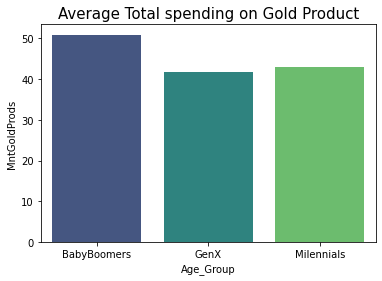

In [111]:
plt.title('Average Total spending on Gold Product', size=15) 
sns.barplot(y=df_gold['MntGoldProds'], x=df_gold['Age_Group'], palette='viridis', ci=0)
plt.show()

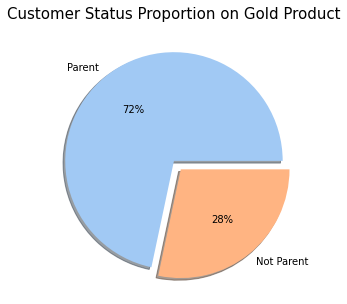

In [112]:
data = [df_gold[df_gold['Parent']==1]['Parent'].count(), df_gold[df_gold['Parent']==0]['Parent'].count()]
labels = ['Parent', 'Not Parent']

plt.figure(figsize=(7, 5)) # Change size
plt.title('Customer Status Proportion on Gold Product', size=15) 
colors = sns.color_palette("pastel")[00:5]

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%', explode=(0, 0.1,),shadow=True)
plt.show()

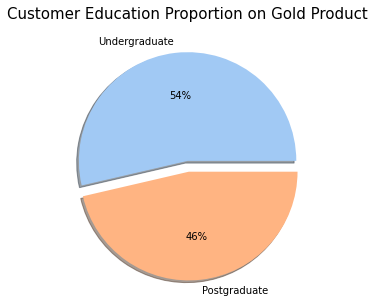

In [116]:
data = [df_gold[df_gold['Education']=='Undergraduate']['Education'].count(), df_gold[df_gold['Education']=='Postgraduate']['Education'].count()]
labels = ['Undergraduate', 'Postgraduate']

plt.figure(figsize=(7, 5)) # Change size
plt.title('Customer Education Proportion on Gold Product', size=15) 
colors = sns.color_palette("pastel")[00:5]

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%', explode=(0, 0.1,),shadow=True)
plt.show()

Karakteristik customer yang mengeluarkan uang untuk membeli produk gold yaitu sebagian besar kelompok usia BabyBoomers, sebagian besar parent, dan untuk edukasi proporsinya hampir seimbang antara postgraduate dengan undergraduate. 

# **6. Kesimpulan dan Rekomendasi**

## **6.1. Kesimpulan**

Dari analisis yang telah dilakukan, kita bisa membuat kesimpulan berikut :
* Marketing campaign yang telah dijalankan perusahaan selama 2 tahun terakhir kurang berhasil karena hanya 27% saja dari total populasi customer yang menerima campaign.
* Engagement customer dari web perusahaan kurang baik
* Karakteristik customer dari produk-produk yang dipasarkan perusahaan sepertinya mengarah kepada kelompok usia Babyboomers, status parent ,dan tingkat pendidikan yang hampir seimbang antara undergraduate dan post graduate.
* Kelompok usia Millenials hampir menyamai rata-rata Babyboomers dalam mengeluarkan uang untuk membeli produk Meat dan Fish

## **6.2. Rekomendasi**

1. Perusahaan diharapkan meningkatkan kualiitas dari web miliknya agar dapat meningkatkan engagement customer dari web.
2. Perusahaan diharapkan dapat menjalankan strategi marketing campaign yang menyasar usia Babyboomers dan status parent untuk seluruh produk yang dijual
3. Untuk produk Meat dan Fish perusahaan juga dapat melakukan strategi marketing campaign yang menyasar kelompok usia Millenials

Dengan mengetahui karakteristik customer dari analisa ini diharapkan perusahaan dapat menjalankan strategi marketing campaign yang terfokus, sehingga dapat menekan biaya marketing campaign, serta dapat meningkatkan performa marketing campaign selama 2 tahun terakhir yang kurang baik.